<ipython-input-2-f93a7c39ad78>:28: RuntimeWarning: overflow encountered in double_scalars
  temperature[t+1, i] = temperature[t, i] + (k*dt/dx**2) * (temperature[t, i-1] - 2*temperature[t, i] + temperature[t, i+1])
<ipython-input-2-f93a7c39ad78>:28: RuntimeWarning: invalid value encountered in double_scalars
  temperature[t+1, i] = temperature[t, i] + (k*dt/dx**2) * (temperature[t, i-1] - 2*temperature[t, i] + temperature[t, i+1])
/usr/local/lib/python3.10/dist-packages/matplotlib/image.py:455: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/usr/local/lib/python3.10/dist-packages/matplotlib/image.py:460: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


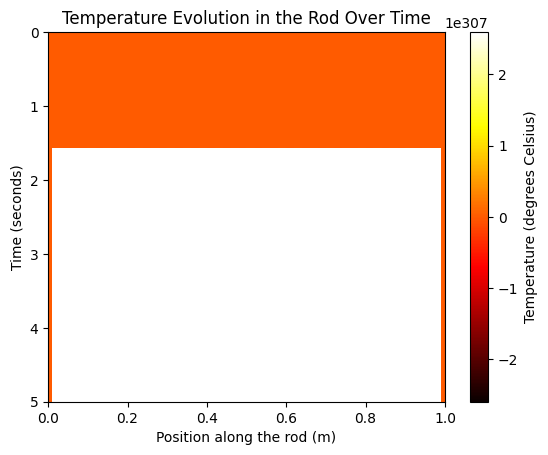

In [2]:
# Import libraries: NumPy for numerical operations and matplotlib.pyplot for plotting graphs
import numpy as np
import matplotlib.pyplot as plt

# Define the physical parameters
length = 1.0  # Total length of the rod in meters
num_x = 50  # Number of points to divide the rod into for simulation
dx = length / (num_x-1)  # Distance between each point on the rod
dt = 0.01  # Time interval between each step in the simulation
k = 1  # Thermal diffusivity constant (assumed to be 1 for simplicity)
total_time = 5.0  # Total duration of the simulation in seconds
num_t = int(total_time / dt)  # Total number of time steps in the simulation

# Initialize the array to store temperature values at each time step and position
temperature = np.zeros((num_t, num_x))

# Set the initial temperature of the rod to 0.5 degrees at all positions
temperature[0, :] = 0.5

# Set boundary conditions: temperature varies as sine of time at the left end, and is constant at the right end
temperature[:, 0] = np.sin(np.linspace(0, total_time, num_t))  # Sinusoidal temperature at the left end
temperature[:, -1] = 1.0  # Constant temperature of 1.0 degrees at the right end

# Simulate the temperature evolution using the Euler forward method
for t in range(num_t - 1):  # Loop through each time step
    for i in range(1, num_x - 1):  # Loop through each position on the rod
        # Update temperature based on the difference equation derived from the heat equation
        temperature[t+1, i] = temperature[t, i] + (k*dt/dx**2) * (temperature[t, i-1] - 2*temperature[t, i] + temperature[t, i+1])

# Plot the results
plt.imshow(temperature, extent=[0, length, total_time, 0], aspect='auto', cmap='hot')  # Display temperature as a heatmap
plt.colorbar(label='Temperature (degrees Celsius)')  # Show a color bar indicating temperature scale
plt.xlabel('Position along the rod (m)')  # Label for the x-axis
plt.ylabel('Time (seconds)')  # Label for the y-axis
plt.title('Temperature Evolution in the Rod Over Time')  # Title for the plot
plt.show()  # Display the plot
